ANN.ipynb - AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar
            Andrew Smith
            Christopher Lee
            Alireza Bagheri
            Musa Azim
         

This program is fre
e software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)

You may want to look at this https://playground.tensorflow.org/
What is an artificial neuron: https://www.youtube.com/shorts/clqzN2lA6Io
What is an Artificial Neural network: https://youtube.com/shorts/kQl45ophSVQ?si=LraxkH_dUVcDYUau


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [65]:
# Generate a synthetic dataset with easy separability
# X represents all the inputs to the model (e.g., age & height or blood pressure & cholesterol, etc.)
# X is also referred to as features or independent variables
# y represents the target variable (e.g., whether a person has a disease or not)
# y is also referred to as the label or dependent variable
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=10,         # Number of features (dimensions)
    n_informative=5,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_repeated=0,
    n_classes=4,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=1.1,         # Separation between the classes
    weights = [0.25, 0.25, 0.25, 0.25], # Can adjust balance of the data
    hypercube=True,
    random_state=42
)

print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [66]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/tmp/ipykernel_4333/1295941256.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')


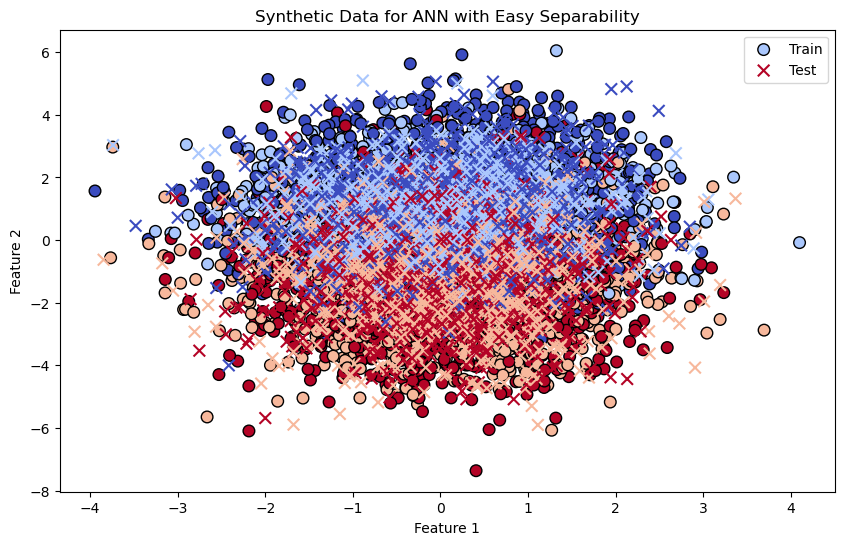

In [67]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=70, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')
plt.title("Synthetic Data for ANN with Easy Separability")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [68]:
# Output dataset shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (7000, 10)
Testing data shape: (3000, 10)
Training labels shape: (7000,)
Testing labels shape: (3000,)


In [ ]:
# Train the multilayer ANN
mlp = MLPClassifier(
    hidden_layer_sizes=(5),
    activation='relu',
    solver='adam',
    max_iter=500,
    learning_rate_init=0.001,
    verbose=True,
    random_state=42
)
mlp.fit(X_train, y_train);

Iteration 1, loss = 0.94239047
Iteration 2, loss = 0.80759429
Iteration 3, loss = 0.71627574
Iteration 4, loss = 0.65161965
Iteration 5, loss = 0.60344633
Iteration 6, loss = 0.56410021
Iteration 7, loss = 0.53089741
Iteration 8, loss = 0.50091240
Iteration 9, loss = 0.47312393
Iteration 10, loss = 0.44670645
Iteration 11, loss = 0.42181250
Iteration 12, loss = 0.39799851
Iteration 13, loss = 0.37518227
Iteration 14, loss = 0.35332837
Iteration 15, loss = 0.33248975
Iteration 16, loss = 0.31247649
Iteration 17, loss = 0.29321893
Iteration 18, loss = 0.27435088
Iteration 19, loss = 0.25548671
Iteration 20, loss = 0.23658070
Iteration 21, loss = 0.21822024
Iteration 22, loss = 0.20014988
Iteration 23, loss = 0.18268531
Iteration 24, loss = 0.16617569
Iteration 25, loss = 0.15114436
Iteration 26, loss = 0.13754109
Iteration 27, loss = 0.12561400
Iteration 28, loss = 0.11523095
Iteration 29, loss = 0.10628476
Iteration 30, loss = 0.09837440
Iteration 31, loss = 0.09146136
Iteration 32, los

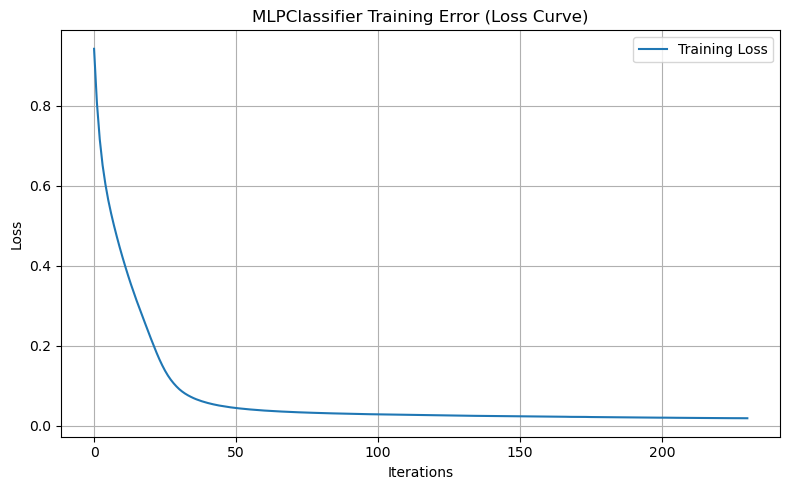

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title("MLPClassifier Training Error (Loss Curve)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# Test the ANN
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

In [57]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Classification Report:\n", classification_report_test)

Training Accuracy: 0.99
Testing Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1483
           1       1.00      0.99      0.99      1517

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



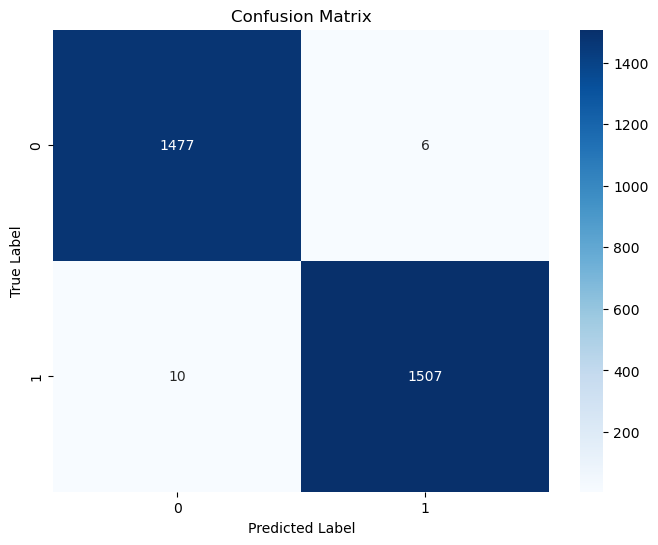

In [58]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

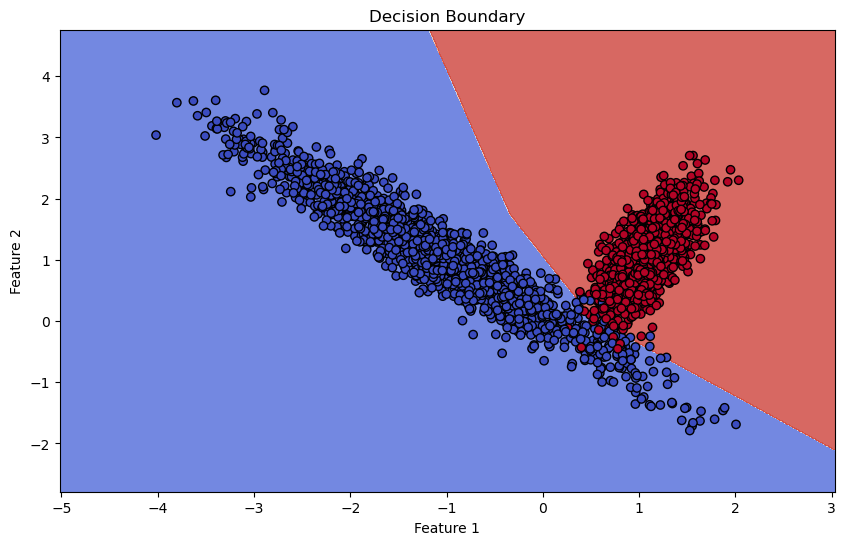

In [48]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test, y_test, mlp)
plt.show()